# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [1]:
# TODO: show visualization

##importing all the libraries that are needed for the computation 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import os
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [2]:
#to access the csv files, we have to traverse to the correct directory

os.chdir('/Users/debapriyamukherjee/Documents/DSF/HW3/house-prices-advanced-regression-techniques/')

# %cd '/content/gdrive/My Drive/DSF/Homework3/house-prices-advanced-regression-techniques'
# !ls

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#reading the train_dataset into the dataframe
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
# print(train_dataset.shape)
# print(train_dataset.head(5))
# print(train_dataset.info())
# print(train_dataset.describe())

[Text(0.5, 0, 'Id'),
 Text(1.5, 0, 'MSSubClass'),
 Text(2.5, 0, 'LotFrontage'),
 Text(3.5, 0, 'LotArea'),
 Text(4.5, 0, 'OverallQual'),
 Text(5.5, 0, 'OverallCond'),
 Text(6.5, 0, 'YearBuilt'),
 Text(7.5, 0, 'YearRemodAdd'),
 Text(8.5, 0, 'MasVnrArea'),
 Text(9.5, 0, 'BsmtFinSF1'),
 Text(10.5, 0, 'BsmtFinSF2'),
 Text(11.5, 0, 'BsmtUnfSF'),
 Text(12.5, 0, 'TotalBsmtSF'),
 Text(13.5, 0, '1stFlrSF'),
 Text(14.5, 0, '2ndFlrSF'),
 Text(15.5, 0, 'LowQualFinSF'),
 Text(16.5, 0, 'GrLivArea'),
 Text(17.5, 0, 'BsmtFullBath'),
 Text(18.5, 0, 'BsmtHalfBath'),
 Text(19.5, 0, 'FullBath'),
 Text(20.5, 0, 'HalfBath'),
 Text(21.5, 0, 'BedroomAbvGr'),
 Text(22.5, 0, 'KitchenAbvGr'),
 Text(23.5, 0, 'TotRmsAbvGrd'),
 Text(24.5, 0, 'Fireplaces'),
 Text(25.5, 0, 'GarageYrBlt'),
 Text(26.5, 0, 'GarageCars'),
 Text(27.5, 0, 'GarageArea'),
 Text(28.5, 0, 'WoodDeckSF'),
 Text(29.5, 0, 'OpenPorchSF'),
 Text(30.5, 0, 'EnclosedPorch'),
 Text(31.5, 0, '3SsnPorch'),
 Text(32.5, 0, 'ScreenPorch'),
 Text(33.5, 0, 'Poo

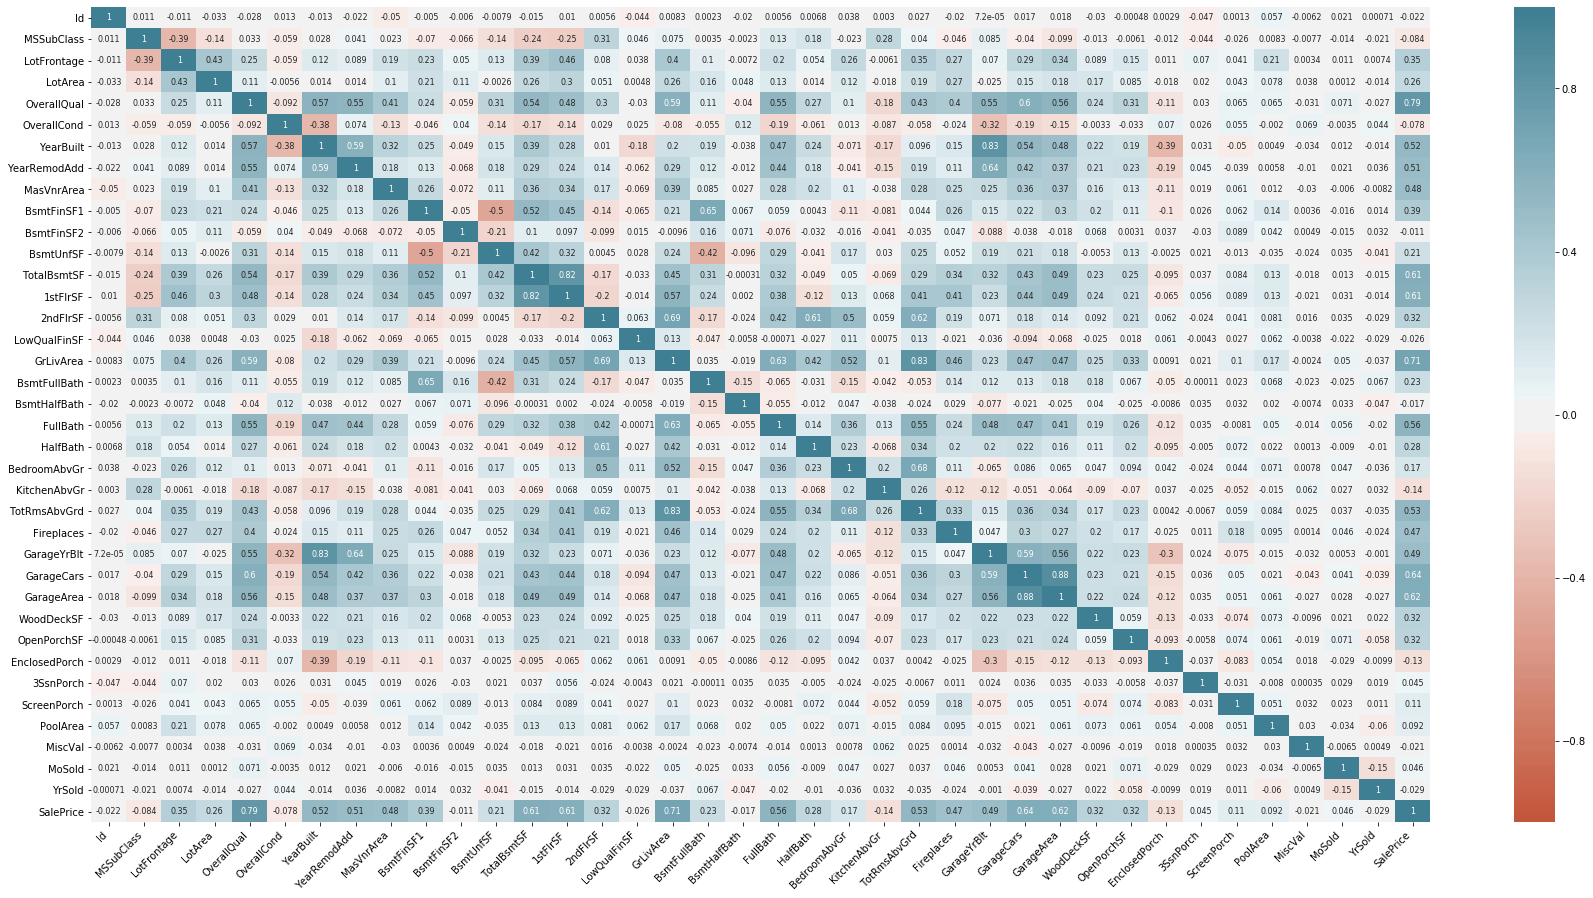

In [5]:
fig, ax = plt.subplots(figsize=(30,15))
corr = train_dataset.corr(method = 'pearson')
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap= sns.diverging_palette(20, 220, n=200), annot=True, annot_kws={"size": 8})
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0.5, 0, 'OverallQual'),
 Text(1.5, 0, 'YearBuilt'),
 Text(2.5, 0, 'YearRemodAdd'),
 Text(3.5, 0, 'MasVnrArea'),
 Text(4.5, 0, 'BsmtFinSF1'),
 Text(5.5, 0, 'BsmtUnfSF'),
 Text(6.5, 0, 'TotalBsmtSF'),
 Text(7.5, 0, '1stFlrSF'),
 Text(8.5, 0, 'GrLivArea'),
 Text(9.5, 0, 'BsmtFullBath'),
 Text(10.5, 0, 'FullBath'),
 Text(11.5, 0, 'TotRmsAbvGrd'),
 Text(12.5, 0, 'GarageYrBlt'),
 Text(13.5, 0, 'GarageCars'),
 Text(14.5, 0, 'SalePrice')]

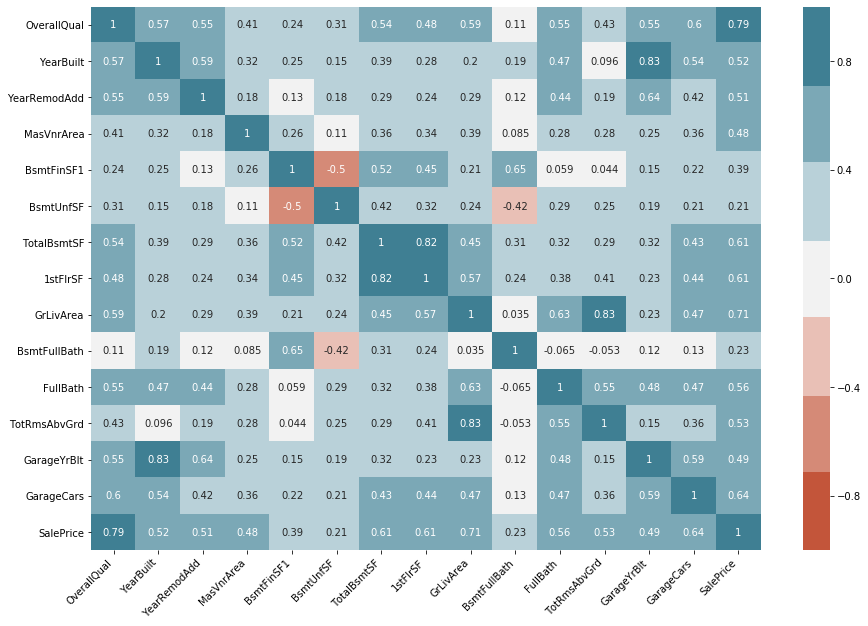

In [6]:
feature_dataset = train_dataset[['OverallQual', 
                           'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF', 
                           'TotalBsmtSF','1stFlrSF','GrLivArea','BsmtFullBath', 
                           'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'SalePrice']]
fig, ax = plt.subplots(figsize=(15,10))
select_corr = feature_dataset.corr(method = 'pearson')
ax = sns.heatmap(select_corr, vmin=-1, vmax=1, center=0, 
                 cmap= sns.diverging_palette(20, 220, n=7), annot=True, annot_kws={"size": 10})
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

So we have a total of 81 features for train and 80 for test variable.
The SalePrice variable is not included in the test dataframe because we will be have to predict or infer the target feature - SalePrice from the test set with the help of a model which will be learning from the train dataset.

The numerical variables in this data include YearRemodAdd, TotalBsmtSF, LotFrontage, LotArea, and YearBuilt
This dataset involves categorical data also such as MSSubClass,MSZoning OverallQual, Alley and OverallCond. 

At the first figure containing the heat map of the whole train dataset, we find some interesting highlights - dark blue cells showing strong correlation between 'SalePrice' (dependent/target variable) and 'TotalBsmtSF', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF' 'GarageArea' etc( Independent given features).

The below mentioned points have been highlighted from the heatmap:

1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice' with the Pearson correlation values as 0.79, 0.71 and 0.61 respectively.

2. 'GarageCars' and 'GarageArea' are also strongly correlated with SalePrice. However, it is an indication that the number of cars that can usually fit into the garage is directly proportional to the garage area. Therefore, it is wise to consider the feature 'GarageCars' instead of 'GarageArea' because its correlation with 'SalePrice' (0.64) is higher than that of 'GarageArea'(0.62).

3. There are also certain negative correlations that can be seen from the above heatmaps such as BsmtFullBath with BsmtUnfSF (-0.42) and BsmtFinSF1 with BsmtUnfSF(0.5).


## Part 2 - Informative Plots

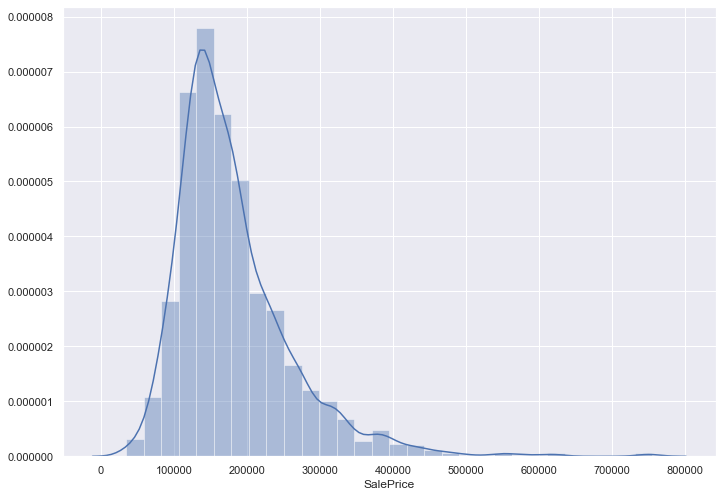

In [7]:
#Distribution of Houses over various ranges of SalePrice
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(train_dataset['SalePrice'], bins=30)
plt.show()

Here, we are checking the average value of the feature 'SalePrice' in the training dataset and after plotting it, we can observe that the Average SalePrice generally will lie between nearly 100000 and 200000, approximately at 150000.

As the SalePrice increases from 200000, the curve starts reducing gradually as can be seen from the plot. So the maximum number of houses will belong to the SalePrice of range 100000 to 200000. Other than that range, the number of houses gradually decreases with the decrease and increase of SalePrice beyond that range.


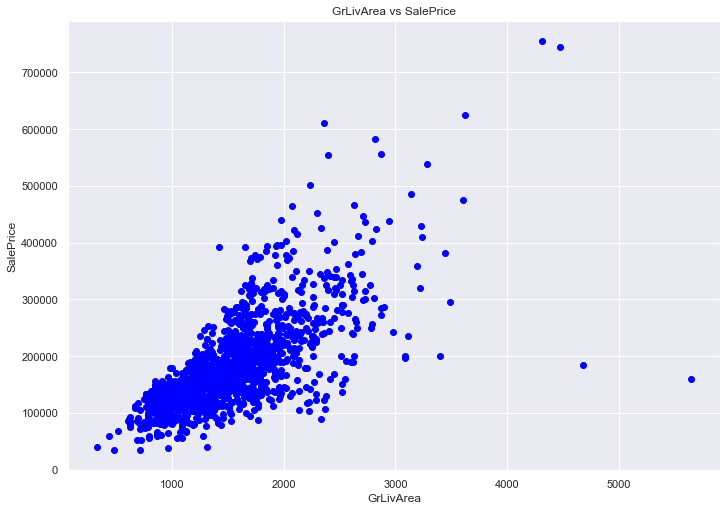

In [8]:
# GrLivArea vs SalePrice.
plt.scatter(train_dataset['GrLivArea'], train_dataset['SalePrice'], color='blue')
plt.title('GrLivArea vs SalePrice') 
# plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('GrLivArea')  
plt.ylabel('SalePrice')
plt.show()

The above Plot 2 reveals that there is a linear relationship between GrLivArea and SalePrice. That means, as GrLiveArea i.e. the ground living area of a house, increases, the SalePrice will also increase proportionally. As it can be seen from the graph, there is a high density of houses when the GrLivArea lies between 500 and 2000, with the SalePrice being in the range of 100000 and 300000. As the GrLivArea increases beyond 2500 units, the SalePrice also increases, implying a lesser density there. 

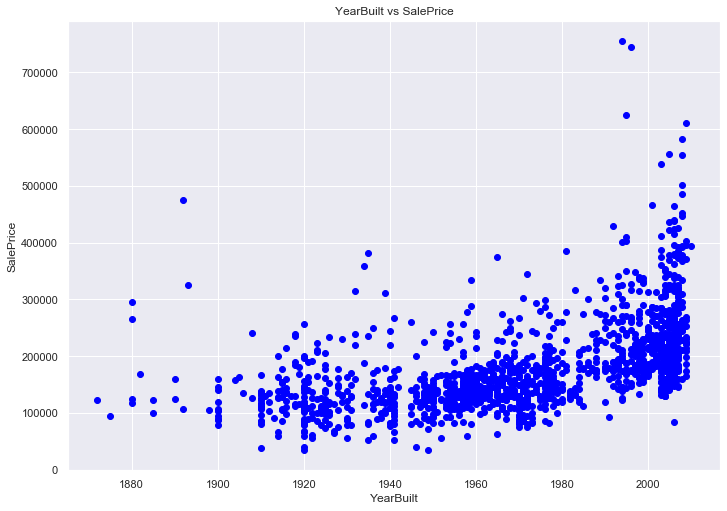

In [9]:
# GrLivArea vs SalePrice.
plt.scatter(train_dataset['YearBuilt'], train_dataset['SalePrice'], color='blue')
plt.title('YearBuilt vs SalePrice') 
plt.xlabel('YearBuilt')  
plt.ylabel('SalePrice')
plt.show()

This is an interesting Plot which reveals that as the years pass, the SalePrice also increases. This shows an almost linear relationship between the two features, i.e. the year in which the house was built and the SalePrice of the house. There is an imlication of vintage houses here. There are multiple instances where an old house is condisered to be vintage, which immediately increases the SalePrice of the house as it is considered to be a heritage property. This is definitely an interesting plot. 

Text(0, 0.5, 'SalePrice')

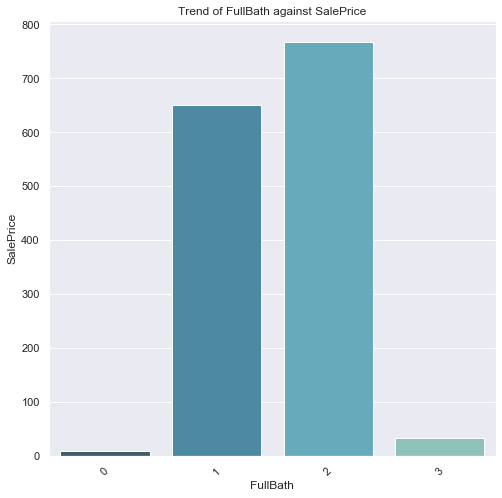

In [10]:
#FullBath Vs SalePrice
plt.figure(figsize=(8,8))
ax = sns.countplot(x="FullBath", data=train_dataset, palette="GnBu_d");
x_col = "FullBath"
y_col = "SalePrice"
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Trend of FullBath against SalePrice')
plt.xlabel('FullBath')  
plt.ylabel('SalePrice')

The Plot 4 reveals that the SalePrice is the highest for two Full baths i.e. full bathrooms above grade. That implies the houses with two Full bath have the maximum tendency to fetch the highest SalePrice. The second highest SalePrice belong to the the houses with one full bath. From the above plot, it can be inferred that the houses with one or three full baths do not fetch the maximum SalePrice. People generally like to buy houses with two or one full baths in it.

<function matplotlib.pyplot.show(*args, **kw)>

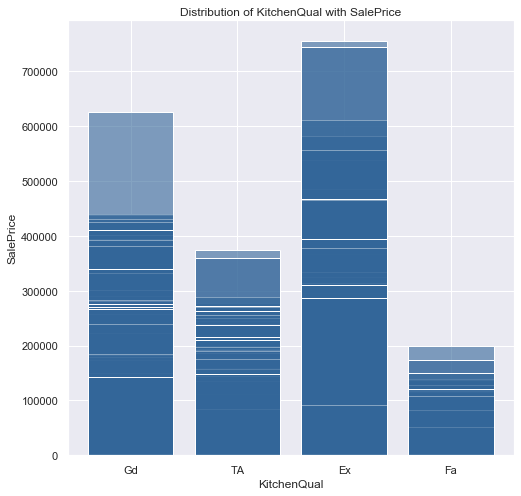

In [11]:
plt.figure(figsize=(8,8))

plt.bar("KitchenQual", "SalePrice", align='center', data = train_dataset, color=[0.2, 0.4, 0.6, 0.6])
plt.xlabel('KitchenQual', horizontalalignment='center')
plt.ylabel('SalePrice')
plt.title('Distribution of KitchenQual with SalePrice')
plt.show

Plot 5 reveals that the SalePrice is maximum when the KitchenQual i.e the kitchen quality in a house is excellent. So this is quite a linear relationship between these two features. The SalePrice gradually decreases with decrease in the quality of the kitchen present in the house. As per implication, the SalePrice is the lowest when the kitchen quality is poor. 

## Part 3 - Handcrafted Scoring Function

In [12]:
#defining a function to change categorical data to numeric data
def data_process_func(distance_dataframe):
  index1 = 0
  # columns = score_columns[['ExterQual','KitchenQual']]
  for element in distance_dataframe['ExterQual']:
    if element == 'Ex':
      distance_dataframe.set_value(index1, 'ExterQual', 10)
    elif element == 'Gd':
      distance_dataframe.set_value(index1, 'ExterQual', 7.5)
    elif element == 'TA':
      distance_dataframe.set_value(index1, 'ExterQual', 5)
    elif element == 'Fa':
      distance_dataframe.set_value(index1, 'ExterQual', 2.5)
    elif element == 'Po':
      distance_dataframe.set_value(index1, 'ExterQual', 0)
    index1 += 1
  
  index3 = 0
  # columns = score_columns[['ExterQual','KitchenQual']]
  for element in distance_dataframe['ExterCond']:
    if element == 'Ex':
      distance_dataframe.set_value(index3, 'ExterCond', 10)
    elif element == 'Gd':
      distance_dataframe.set_value(index3, 'ExterCond', 7.5)
    elif element == 'TA':
      distance_dataframe.set_value(index3, 'ExterCond', 5)
    elif element == 'Fa':
      distance_dataframe.set_value(index3, 'ExterCond', 2.5)
    elif element == 'Po':
      distance_dataframe.set_value(index3, 'ExterCond', 0)
    index3 += 1

  

  index2 = 0 
  # columns = score_columns[['ExterQual','KitchenQual']]
  for element in distance_dataframe['KitchenQual']:
    if element == 'Ex':
      distance_dataframe.set_value(index2, 'KitchenQual', 10)
    elif element == 'Gd':
      distance_dataframe.set_value(index2, 'KitchenQual', 7.5)
    elif element == 'TA':
      distance_dataframe.set_value(index2, 'KitchenQual', 5)
    elif element == 'Fa':
      distance_dataframe.set_value(index2, 'KitchenQual', 2.5)
    elif element == 'Po':
      distance_dataframe.set_value(index2, 'KitchenQual', 0)
    index2 += 1

  distance_dataframe['ExterQual'] = pd.to_numeric(distance_dataframe['ExterQual'])  
  distance_dataframe['ExterCond'] = pd.to_numeric(distance_dataframe['ExterCond'])
  distance_dataframe['KitchenQual'] = pd.to_numeric(distance_dataframe['KitchenQual'])    

  distance_dataframe['SalePrice'] = distance_dataframe['SalePrice'].apply(lambda x : x/distance_dataframe['SalePrice'].mean())
  distance_dataframe['GrLivArea'] = distance_dataframe['GrLivArea'].apply(lambda x : x/distance_dataframe['GrLivArea'].mean())
  distance_dataframe['GarageArea'] = distance_dataframe['GarageArea'].apply(lambda x : x/distance_dataframe['GarageArea'].mean())
  return distance_dataframe


score_columns_copy = train_dataset[['SalePrice','OverallQual','GrLivArea','ExterQual',
                               'GarageCars','KitchenQual', 'OverallCond', 'ExterCond', 'GarageArea']]
score_columns_copy = data_process_func(score_columns_copy)
# print(score_columns_copy.shape)
score_correlation = score_columns_copy.corr(method = 'pearson')
# print(score_correlation)       
weight1 = score_correlation['SalePrice']['SalePrice']
weight2 = score_correlation['SalePrice']['ExterQual']
weight3 = score_correlation['SalePrice']['KitchenQual']
weight4 = score_correlation['SalePrice']['GarageCars']
weight5 = score_correlation['SalePrice']['GrLivArea']
weight6 = score_correlation['SalePrice']['OverallQual']
weight7 = score_correlation['SalePrice']['ExterCond']
weight8 = score_correlation['SalePrice']['GarageArea']
weight9 = score_correlation['SalePrice']['OverallCond']
score_columns_copy['SalePrice'] = score_columns_copy['SalePrice'].apply(lambda x: x*weight1)
score_columns_copy['ExterQual'] = score_columns_copy['ExterQual'].apply(lambda x: x*weight2)
score_columns_copy['KitchenQual'] = score_columns_copy['KitchenQual'].apply(lambda x: x*weight3)
score_columns_copy['GarageCars'] = score_columns_copy['GarageCars'].apply(lambda x: x*weight4)
score_columns_copy['GrLivArea'] = score_columns_copy['GrLivArea'].apply(lambda x: x*weight5)
score_columns_copy['OverallQual'] = score_columns_copy['OverallQual'].apply(lambda x: x*weight6)
score_columns_copy['ExterCond'] = score_columns_copy['ExterCond'].apply(lambda x: x*weight7)
score_columns_copy['GarageArea'] = score_columns_copy['GarageArea'].apply(lambda x: x*weight8)
score_columns_copy['OverallCond'] = score_columns_copy['OverallCond'].apply(lambda x: x*weight9)
# print(score_columns_copy.shape)
desirability_matrix = pd.DataFrame(score_columns_copy.sum(axis=1), columns = ['Score'])
most_desirable = desirability_matrix.nlargest(10, ['Score'])
least_desirable = desirability_matrix.nsmallest(10, ['Score'])
print(most_desirable)
print(least_desirable)

          Score
691   30.168677
1182  28.534434
803   28.053704
440   28.035206
1373  27.828046
898   27.734692
1298  27.709833
825   27.669190
591   27.640132
1243  27.619936
         Score
533   4.333658
375   4.875841
636   5.456953
88    6.803447
1323  6.856086
705   6.992107
1100  7.850478
250   8.312945
1337  8.623419
976   8.654548


[Text(0, 0.5, 'SalePrice'),
 Text(0, 1.5, 'OverallQual'),
 Text(0, 2.5, 'GrLivArea'),
 Text(0, 3.5, 'ExterQual'),
 Text(0, 4.5, 'GarageCars'),
 Text(0, 5.5, 'KitchenQual'),
 Text(0, 6.5, 'OverallCond'),
 Text(0, 7.5, 'ExterCond'),
 Text(0, 8.5, 'GarageArea')]

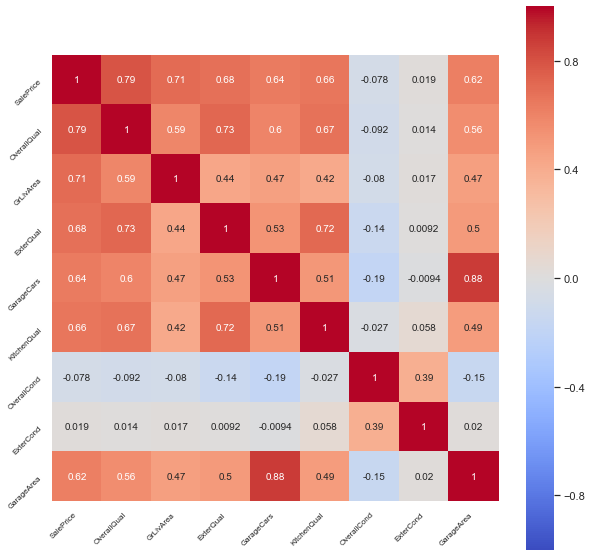

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(score_correlation, vmin=-1, vmax=1, center=0, 
                 cmap= 'coolwarm', square = True, annot=True, annot_kws={"size": 10})
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')

The ten most desirable houses are given below with the IDs in the descending order:

691 (Score- 30.168677), 1182  (Score- 28.534434), 803  (Score- 28.053704), 440   (Score- 28.035206), 1373 (Score-  27.828046), 898   (Score- 27.734692), 1298  (Score- 27.709833), 825   (Score- 27.669190), 591   (Score- 27.640132), 1243  (Score- 27.619936)

The ten least desirable houses are given below with the IDs with the appropriate score:
533    (Score- 4.333658), 375    (Score- 4.875841), 636    (Score- 5.456953), 88     (Score- 6.803447), 1323   (Score-6.856086), 705    (Score- 6.992107), 1100   (Score- 7.850478), 250    (Score- 8.312945), 1337   (Score- 8.623419), 976    (Score- 8.654548)

The scoring function has been based on the linear combination of the weighted vectors of the features. The following features have been considered here:
1. SalePrice
2. OverallQual
3. OverallCond
4. ExterQual
5. ExterCond
6. GarageArea
7. GarageCars
8. KitchenQual

The scoring function has been formed by analysing, cleaning and normalizing the data to produce and effective scoring function to determine the rank of houses by “desirability”. Desirability here is considered as the houses which are not necessarily affordable, but they are kind of dream houses, which people would prefer to buy. Based on the scoring function, the top ten and the least ten desirable houses have been predicted.


## Part 4 - Pairwise Distance Function

In [14]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial import distance

def distance_func(distance_dataframe):
  return pairwise_distances(distance_dataframe, metric='euclidean')

distance_dataframe = train_dataset[['SalePrice','OverallQual','GrLivArea',
                                    'ExterQual', 'GarageCars','KitchenQual', 
                                    'OverallCond', 'ExterCond', 'GarageArea']]

distance_dataframe = data_process_func(distance_dataframe)
distance_matrix = distance_func(distance_dataframe)
distance_df = pd.DataFrame(distance_matrix)
print(distance_df.head(5))

mean1 = distance_dataframe['SalePrice'].mean()
mean2 = distance_dataframe['GrLivArea'].mean()
dist = distance.euclidean(mean1,mean2)
print(dist)  

mean3 = distance_dataframe['GarageArea'].mean()
mean4 = distance_dataframe['GarageCars'].mean()
dist = distance.euclidean(mean3,mean4)
print(dist)

mean5 = distance_dataframe['SalePrice'].mean()
mean6 = distance_dataframe['GarageCars'].mean()
dist = distance.euclidean(mean5,mean6)
print(dist)

       0         1         2         3         4         5         6     \
0  0.000000  4.758600  0.159628  2.726329  1.589677  4.087110  1.153750   
1  4.758600  0.000000  4.771935  4.188177  5.258972  3.170398  5.118682   
2  0.159628  4.771935  0.000000  2.733175  1.525692  4.104813  1.104625   
3  2.726329  4.188177  2.733175  0.000000  2.808672  3.379713  3.017022   
4  1.589677  5.258972  1.525692  2.808672  0.000000  4.870381  1.178417   

       7         8         9     ...      1450      1451      1452      1453  \
0  3.685565  3.566389  4.410282  ...  4.691044  2.971097  4.099120  4.738522   
1  2.304680  3.193082  2.535499  ...  3.889913  6.802909  3.174162  3.903818   
2  3.691320  3.585433  4.448021  ...  4.731421  2.938192  4.115948  4.787943   
3  2.920985  2.718431  4.036927  ...  4.592966  3.787431  3.390148  4.618600   
4  4.016879  3.952758  5.418421  ...  5.838915  2.541550  4.880700  5.911709   

       1454      1455      1456      1457      1458      1459  
0  0

Here, the euclidean pairwise distances have been calculated using two different methods.

Furthermore, the distances between the features have been calculated in yet another way. It shows that as the euclidean distance between the features increases, their similarities decreases. Two very similar features will have zero or near to zero euclidean distances, thereby implying they have the same properties.

Here the distance matrix has been calculated. Also, there has been a comparison of three features above:

Euclidean distance between SalePrice and GrLivArea : 3.3306690738754696e-16

Euclidean distance between GarageArea and GarageCars : 0.7671232876712343

Euclidean distance between  SalePrice and GarageCars : 0.7671232876712339



## Part 5 - Clustering

(1460, 1460)
AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=5,
                        pooling_func='deprecated')


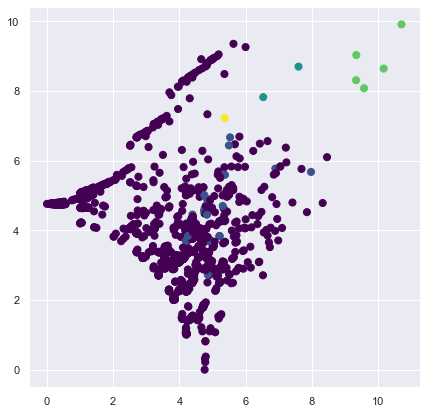

In [15]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage = 'average')
print(distance_matrix.shape)
clustering = agg.fit(distance_matrix)
print(clustering)
clustering.labels_
# X = np.array(distance_dataframe.drop(['SalePrice'], 1).astype(float))
# plt.scatter(distance_dataframe[:,0],distance_dataframe[:,1], c=cluster.labels_, cmap='rainbow')
# plt.xlim(-15,15)
# plt.ylim(-15,15)
plt.figure(figsize=(7, 7))
plt.scatter(distance_matrix[:,0], distance_matrix[:,1], c=clustering.labels_, s=50, cmap='viridis')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')


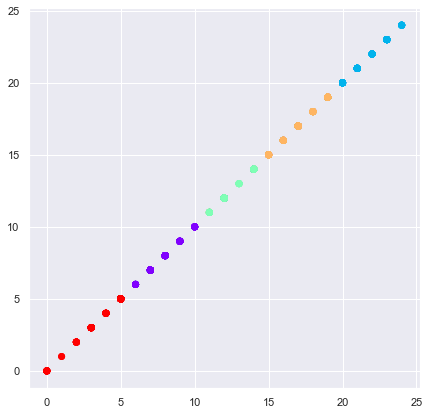

In [16]:
neighbouring_df = train_dataset['Neighborhood'].astype("category").cat.codes
agg1 = AgglomerativeClustering(n_clusters=5)
clustering = agg1.fit(pd.DataFrame(neighbouring_df))
print(clustering)
clustering.labels_
plt.figure(figsize=(7, 7))
plt.scatter(neighbouring_df[:], neighbouring_df[:],c=clustering.labels_, cmap ='rainbow_r')
plt.show()


Clustering is defined to be a technique that groups the data points into a group of similar features or properties. Given a training dataset, the clustering algorithm involves fetching data points, such that each data point can be classified into a specific group. This problem involves the implementation of the aglomerative clustering algorithm which is basically a heirarchical clustering algorithm. It treats every object to be a singleton cluster and groups the data points by their similarity. We have made 5 clusters involving the distance matrix containing the pairwise euclidean distance. We compare this to the clusters made on the basis of neighbourhood feature of the training dataset. The clusterings have been denoted by the scatterplots above. The similarities or dissimilarities cannot be understood here by these two scatterplots. The comparison between the above two can only be confirmed by analysing it more deeply.

## Part 6 - Linear Regression

Accuracy:  0.434131473561856
   Actual      Predicted
0  200624  290645.119259
1  133000  187327.428687
2  110000  145978.299590
3  192000  236284.797539
4   88000  133738.957377


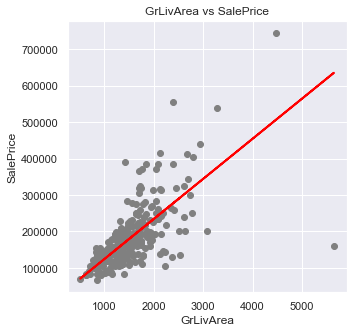

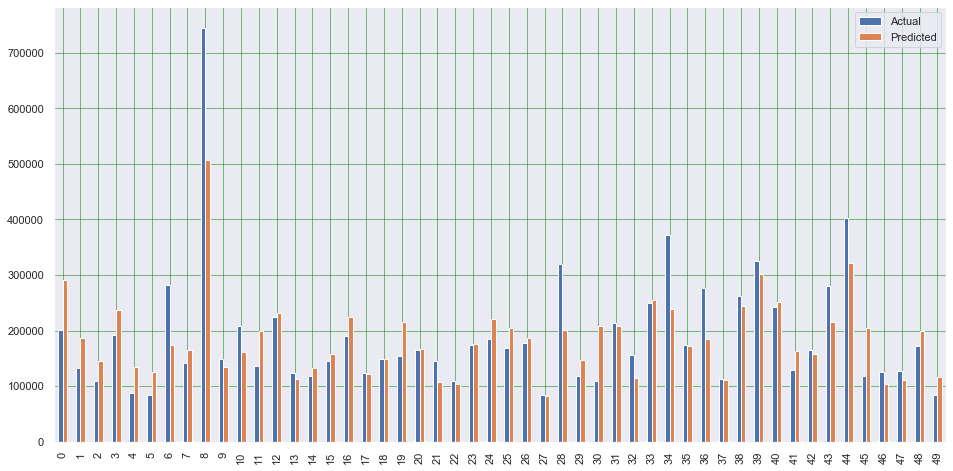

In [17]:
#Linear Regression Model 1
X = train_dataset['GrLivArea'].values.reshape(-1,1)
y = train_dataset['SalePrice'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
accuracy_score = explained_variance_score(y_test, y_pred)
print('Accuracy: ', accuracy_score)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(5))
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(X_test, y_test,  color='gray')
plt.title('GrLivArea vs SalePrice') 
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('GrLivArea')  
plt.ylabel('SalePrice')
plt.show()
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


Accuracy:  0.6282234631454687
   Actual      Predicted
0  200624  176884.202807
1  133000  176884.202807
2  110000  131497.617451
3  192000  222270.788164
4   88000  176884.202807


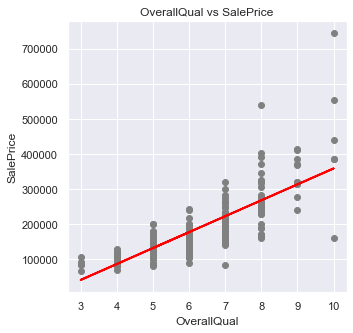

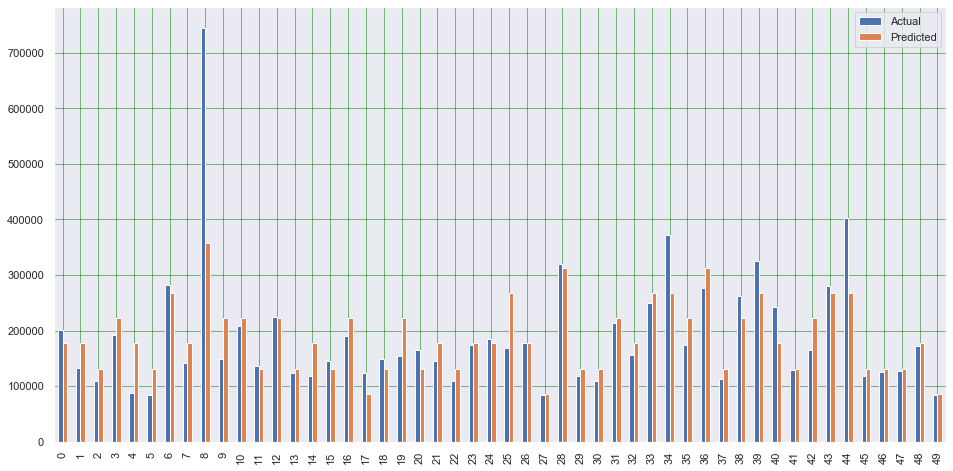

In [18]:
#Linear Regression Model 2
X = train_dataset['OverallQual'].values.reshape(-1,1)
y = train_dataset['SalePrice'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
accuracy_score = explained_variance_score(y_test, y_pred)
print('Accuracy: ', accuracy_score)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(5))
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(X_test, y_test,  color='gray')
plt.title('OverallQual vs SalePrice') 
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('OverallQual')  
plt.ylabel('SalePrice')
plt.show()
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Accuracy:  0.252413567308442
   Actual      Predicted
0  200624  245198.259958
1  133000  140307.362286
2  110000  140307.362286
3  192000  218975.535540
4   88000  166530.086704


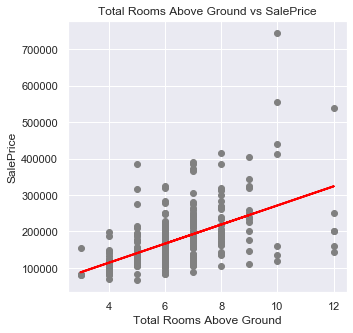

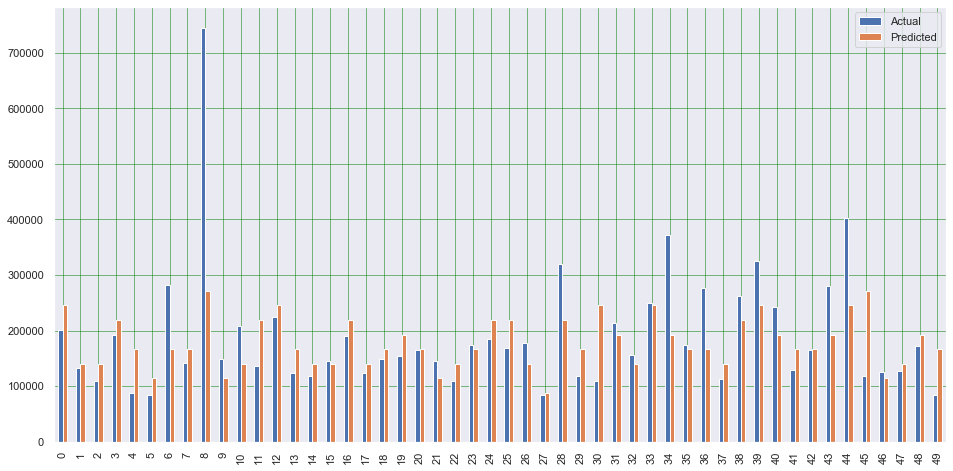

In [19]:
##Linear Regression Model 3
X = train_dataset['TotRmsAbvGrd'].values.reshape(-1,1)
y = train_dataset['SalePrice'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
accuracy_score = explained_variance_score(y_test, y_pred)
print('Accuracy: ',accuracy_score)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(5))
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(X_test, y_test,  color='gray')
plt.title('Total Rooms Above Ground vs SalePrice') 
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Total Rooms Above Ground')  
plt.ylabel('SalePrice')
plt.show()
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Accuracy:  0.26522438190169395
   Actual      Predicted
0  200624  299637.021193
1  133000  150842.782068
2  110000  139099.054488
3  192000  193701.334265
4   88000  116822.292895


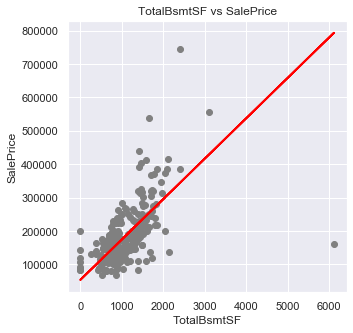

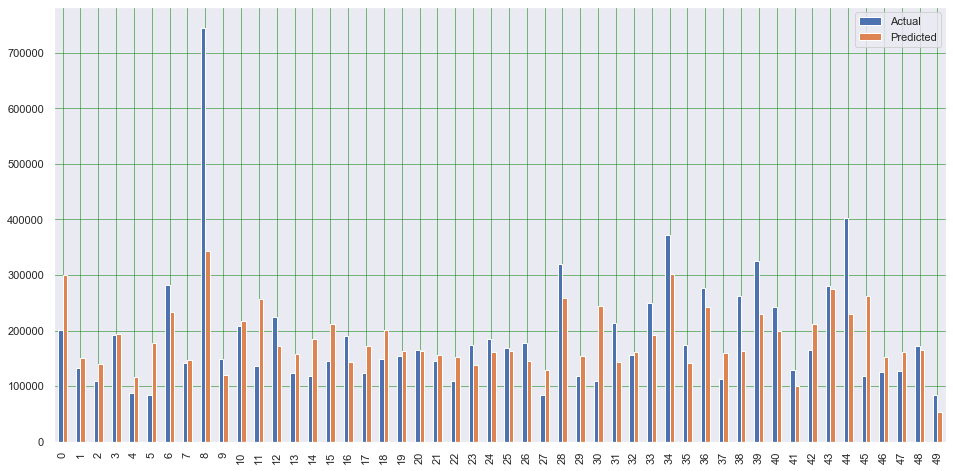

In [20]:
#Linear Regression Model 4
X = train_dataset['TotalBsmtSF'].values.reshape(-1,1)
y = train_dataset['SalePrice'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
accuracy_score = explained_variance_score(y_test, y_pred)
print('Accuracy: ',accuracy_score)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(5))
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(X_test, y_test,  color='gray')
plt.title('TotalBsmtSF vs SalePrice') 
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('TotalBsmtSF')  
plt.ylabel('SalePrice')
plt.show()
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Accuracy:  0.28011901404301753
   Actual      Predicted
0  200624  183321.408069
1  133000  124188.119398
2  110000  151331.268297
3  192000  188410.748488
4   88000  130004.508448


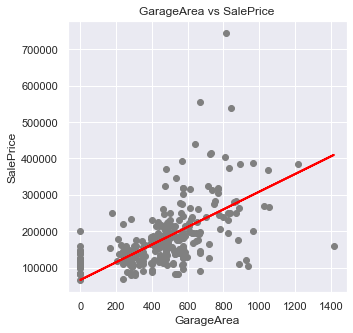

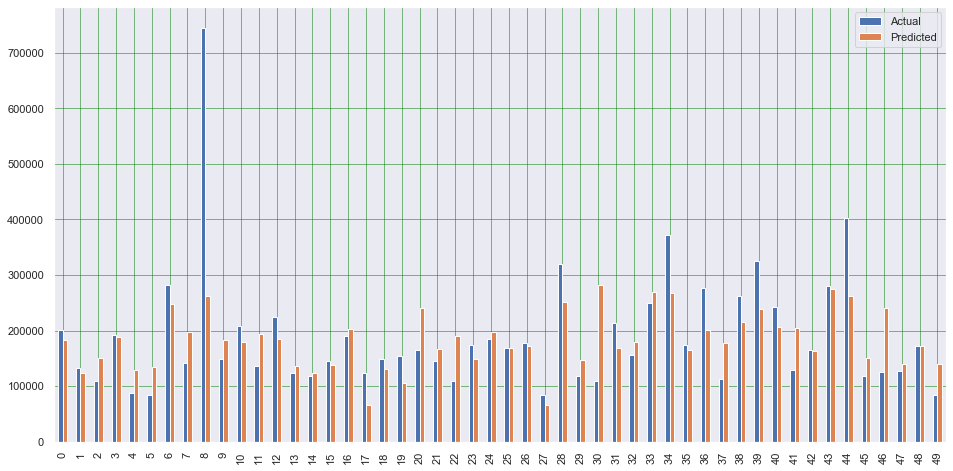

In [21]:
#Linear Regression Model 5
X = train_dataset['GarageArea'].values.reshape(-1,1)
y = train_dataset['SalePrice'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
accuracy_score = explained_variance_score(y_test, y_pred)
print('Accuracy: ',accuracy_score)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df.head(5))
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(X_test, y_test,  color='gray')
plt.title('GarageArea vs SalePrice') 
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('GarageArea')  
plt.ylabel('SalePrice')
plt.show()
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


The most important feature, that clearly dominates the training dataset is "GrLivArea". This feature was chosen based on its strong correlation with the target value "SalePrice". The accuracy of the linear regression model comes out to be 0.434131473561856 which is obviously not the best. But it is better than the rest of the features. 
There is a stronger correlation between OverallQual with SalePrice but the accuracy of the model featuring these two parameters comes out to be less than that compared with GrLivArea. As can be seen by the scatter plot between GrLivArea and SalePrice, it comes out to be a linear straight line denoting y = mx + c, thus successfully implementing Linear Regression Model.

## Part 7 - External Dataset

(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


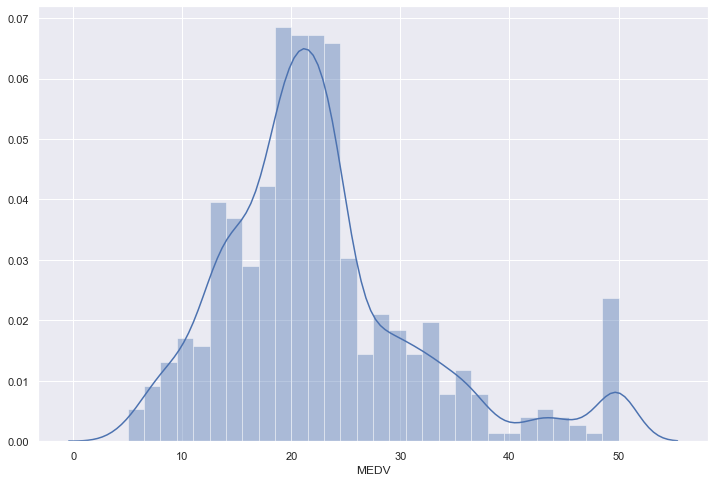

In [22]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
print(boston_df.shape)
print(boston_df.head())
print(boston_df.isnull().sum())
boston_df['MEDV'] = boston_dataset.target
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(boston_df['MEDV'], bins=30)
plt.show()

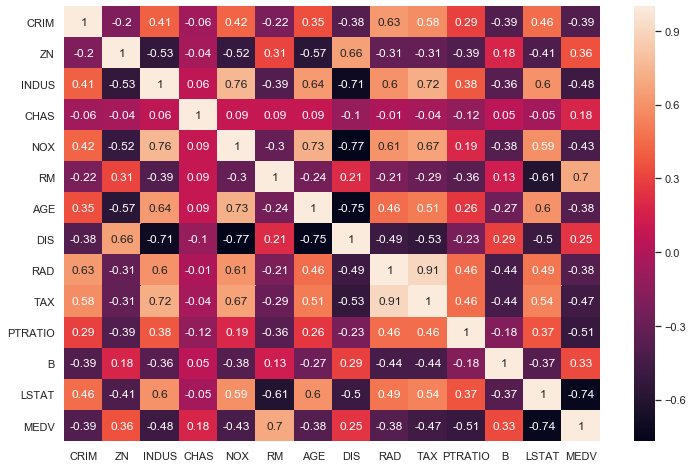

In [23]:
corr_mat = boston_df.corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

In [24]:
lstat = boston_df['LSTAT']
rm = boston_df['RM']
X = pd.DataFrame(np.c_[lstat, rm], columns = ['LSTAT','RM'])
Y = boston_df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


The external dataset considered here is Boston Housing dataset. The features included in this dataset are mentioned below:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per \$10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

Here MEDV is the target variable in the Boston housing dataset, which is basically similar to our problem statement i.e. to predict the value of a house.
The next step involve plotting a heat map to see the correlation between the features.
Observations:
1. Correlation between RM and MEDV is 0.7, which indicates there is a positive correlation between them.
2. Correlation between LSTAT and MEDV is-0.74, which indicates negative correlation..
3. Correlation between the features RAD and TAX is 0.91, which indicates strong correlation. 
4. Correlation between the features DIS and AGE is -0.75, which indicates negative correlation.

After the initial analysis of the Boston Housing dataset, it can been seen that there is very less similarity between the Ames Housing dataset and Boston Housing dataset, just the target feature is the same i.e the sale value of the house. So when we merge these two datasets, a major chunk of the information will be lost due to many NaN values. So the prediction accuracy will not improve if we consider the Boston Housing dataset.

Hence, we have to keep in mind that we have to choose such an external dataset which does not hamper the training data, thereby retaining the maximum information of the data set.


## Part 8 - Permutation Test

In [25]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import permutation_test_score

def rmserror(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

regressor = LinearRegression() 
y = train_dataset['SalePrice'].apply(lambda x : math.log(x)).values.reshape(-1,1)
  
  
X = train_dataset['GrLivArea'].apply(lambda x: math.log(x)).values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 1(GrLivArea Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 1(GrLivArea Vs SalePrice) is: ', pvalue)


X = train_dataset['OverallQual'].apply(lambda x : math.log(x)).values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 2(OverallQual Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 2(OverallQual Vs SalePrice) is: ', pvalue)


X = train_dataset['YearBuilt'].apply(lambda x : math.log(x)).values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 3(YearBuilt Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 3(YearBuilt Vs SalePrice) is: ', pvalue)


X = train_dataset['1stFlrSF'].apply(lambda x : math.log(x)).values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 4(1stFlrSF Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 4(1stFlrSF Vs SalePrice) is: ', pvalue)

X = train_dataset['GarageCars'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 5(GarageCars Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 5(GarageCars Vs SalePrice) is: ', pvalue)

X = train_dataset['GarageArea'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 6(GarageArea Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 6(GarageArea Vs SalePrice) is: ', pvalue)


X = train_dataset['YearRemodAdd'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 7(YearRemodAdd Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 7(YearRemodAdd Vs SalePrice) is: ', pvalue)

X = train_dataset['TotRmsAbvGrd'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 8(TotRmsAbvGrd Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 8(TotRmsAbvGrd Vs SalePrice) is: ', pvalue)

X = train_dataset['FullBath'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 9(FullBath Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 9(FullBath Vs SalePrice) is: ', pvalue)

X = train_dataset['TotalBsmtSF'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = rmserror(y_test, y_pred)
print('The root mean square error for Linear Regression Model 10(TotalBsmtSF Vs SalePrice) is: ',error)
score,permutation_score,pvalue = permutation_test_score(regressor, X_train, y_train)
print('The p-value for Linear Regression Model 10(TotalBsmtSF Vs SalePrice) is: ', pvalue)

The root mean square error for Linear Regression Model 1(GrLivArea Vs SalePrice) is:  0.2709873686159073
The p-value for Linear Regression Model 1(GrLivArea Vs SalePrice) is:  0.009900990099009901
The root mean square error for Linear Regression Model 2(OverallQual Vs SalePrice) is:  0.2188240931929537
The p-value for Linear Regression Model 2(OverallQual Vs SalePrice) is:  0.009900990099009901
The root mean square error for Linear Regression Model 3(YearBuilt Vs SalePrice) is:  0.3087249196882968
The p-value for Linear Regression Model 3(YearBuilt Vs SalePrice) is:  0.009900990099009901
The root mean square error for Linear Regression Model 4(1stFlrSF Vs SalePrice) is:  0.3138270229304451
The p-value for Linear Regression Model 4(1stFlrSF Vs SalePrice) is:  0.009900990099009901
The root mean square error for Linear Regression Model 5(GarageCars Vs SalePrice) is:  0.314499999249918
The p-value for Linear Regression Model 5(GarageCars Vs SalePrice) is:  0.009900990099009901
The root mea

Permutation tests are actually an indication of the statistical significance of an event happening. It turns out that the p-value of all the single-variate linear regression comes out to be a single value i.e. 0.009 approximately. 
The observations found are listed below for ten single-variable linear regression model:

The root mean square error for Linear Regression Model 1(GrLivArea Vs SalePrice) is:  0.27098736861590733.


The root mean square error for Linear Regression Model 2(OverallQual Vs SalePrice) is:  0.2188240931929536.


The root mean square error for Linear Regression Model 3(YearBuilt Vs SalePrice) is:  0.30872491968829635.


The root mean square error for Linear Regression Model 4(1stFlrSF Vs SalePrice) is:  0.3138270229304451.


The root mean square error for Linear Regression Model 5(GarageCars Vs SalePrice) is:  0.3144999992499181.


The root mean square error for Linear Regression Model 6(GarageArea Vs SalePrice) is:  0.3241483902938889.



The root mean square error for Linear Regression Model 7(YearRemodAdd Vs SalePrice) is:  0.32804308223985906.


The root mean square error for Linear Regression Model 8(TotRmsAbvGrd Vs SalePrice) is:  0.3322089352823487.


The root mean square error for Linear Regression Model 9(FullBath Vs SalePrice) is:  0.3285045357384039.


The root mean square error for Linear Regression Model 10(TotalBsmtSF Vs SalePrice) is:  0.3399752372558254.

The p-value for All the Linear Regression Models comes out to be:  0.009900990099009901.


## Part - Building Model Task

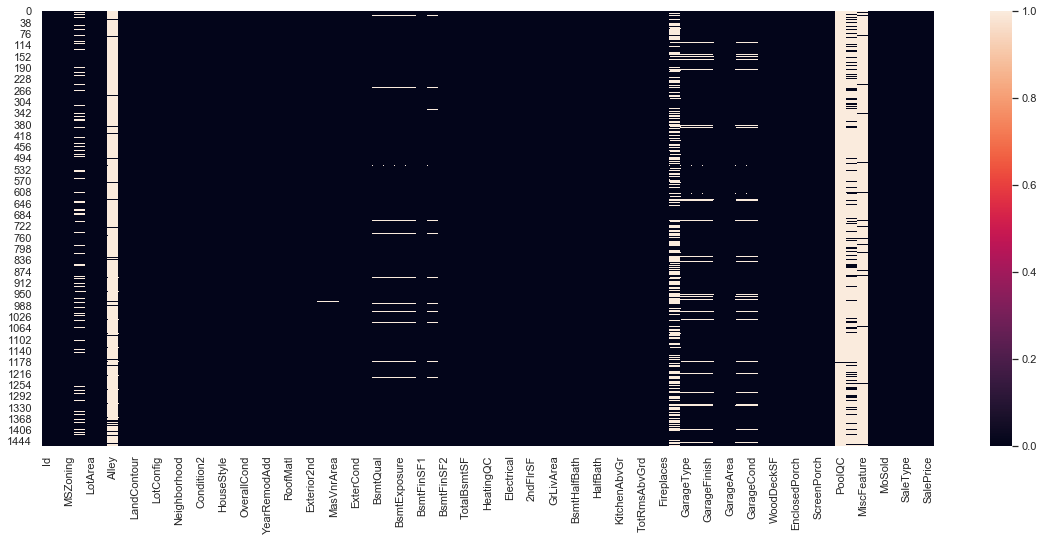

In [26]:
#First, we have to check to see if there are null values in the training dataset

plt.figure(figsize=(20,8))
sns.heatmap(train_dataset.isna())

In [27]:
# Dropping ID because it is unique for every row
# Replacing NaN values using median 
train_dataset.drop(columns=['Id'], axis=1, inplace=True)
train_dataset = train_dataset[['MSZoning','LotFrontage','Street','Alley','LotShape','LandContour','LandSlope','Neighborhood',
                              'BldgType','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea', 'TotalBsmtSF',
                              'GrLivArea','FullBath','TotRmsAbvGrd','GarageYrBlt','GarageArea','1stFlrSF',
                              'ExterQual','ExterCond','Foundation','BsmtCond','HeatingQC','CentralAir',
                              'KitchenQual','GarageCond','SaleType','SaleCondition','SalePrice']]
train_dataset['LotFrontage'].fillna(train_dataset['LotFrontage'].median(), inplace=True)
train_dataset['GarageYrBlt'].fillna(train_dataset['GarageYrBlt'].median(), inplace=True)
train_dataset['MasVnrArea'].fillna(train_dataset['MasVnrArea'].median(), inplace=True)
# null_columns_train = train_dataset.columns[train_dataset.isnull().any()]
# print(null_columns_train)
for element in train_dataset['Alley']:
  if element == 'NA':
    element = "NoAlley"

for element in train_dataset['BsmtCond']:
  if element == 'NA':
    element = "NoBsmt"    

for element in train_dataset['GarageCond']:
  if element == 'NA':
    element = "NoGarage"    
    
train_dataset_enc = train_dataset.copy()
columns_list = ['MSZoning','Street','Alley','LotShape','LandContour','LandSlope','Neighborhood',
                              'BldgType','OverallQual',
                              'ExterQual','ExterCond','Foundation','BsmtCond','HeatingQC','CentralAir',
                              'KitchenQual','GarageCond','SaleType','SaleCondition']
train_dataset_enc = pd.get_dummies(data = train_dataset_enc, columns = columns_list)
# print(train_dataset_enc.shape)
# print(train_dataset_enc.isnull().any().any())
# print(train_dataset_enc.head(5))
# print(test_dataset.shape)
test_ids = test_dataset['Id']
test_dataset.drop(columns=['Id'], axis=1, inplace=True)
test_dataset = test_dataset[['MSZoning','LotFrontage','Street','Alley','LotShape','LandContour','LandSlope','Neighborhood',
                              'BldgType','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea', 'TotalBsmtSF',
                              'GrLivArea','FullBath','TotRmsAbvGrd','GarageYrBlt','GarageArea','1stFlrSF',
                              'ExterQual','ExterCond','Foundation','BsmtCond','HeatingQC','CentralAir',
                              'KitchenQual','GarageCond','SaleType','SaleCondition']]
test_dataset['LotFrontage'].fillna(test_dataset['LotFrontage'].median(), inplace=True)
test_dataset['GarageYrBlt'].fillna(test_dataset['GarageYrBlt'].median(), inplace=True)
test_dataset['MasVnrArea'].fillna(test_dataset['MasVnrArea'].median(), inplace=True)
test_dataset['TotalBsmtSF'].fillna(test_dataset['TotalBsmtSF'].median(), inplace=True)
test_dataset['GarageArea'].fillna(test_dataset['GarageArea'].median(), inplace=True)
null_columns_test = test_dataset.columns[test_dataset.isnull().any()]
# print(null_columns_test)   
test_dataset_enc = test_dataset.copy()
columns_list = ['MSZoning','Street','Alley','LotShape','LandContour','LandSlope','Neighborhood',
                              'BldgType','OverallQual',
                              'ExterQual','ExterCond','Foundation','BsmtCond','HeatingQC','CentralAir',
                              'KitchenQual','GarageCond','SaleType','SaleCondition']
test_dataset_enc = pd.get_dummies(data = test_dataset_enc, columns = columns_list)
# print(test_dataset_enc.shape)

In [28]:
#Logistic Regression Model

X_saleprice = train_dataset_enc['SalePrice'].values.reshape(-1,1)
X_saleprice = X_saleprice[0:1459]
print(X_saleprice.shape)
traindf = train_dataset_enc.drop(columns='SalePrice',axis=1)
print('TrainDf:', traindf.shape)
print('TestDf:', test_dataset_enc.shape)
sc_x = StandardScaler()
X_train = sc_x.fit_transform(traindf[0:1459])
X_test = sc_x.fit_transform(test_dataset_enc)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
clf = LogisticRegression()
print('X_saleprice:', X_saleprice.shape)
clf.fit(X_train, X_saleprice)
preds = clf.predict(test_dataset_enc)
print(preds)
score = clf.score(X_test, preds)
print(score)
# validationdf = pd.read_csv('sample_submission.csv')
# validationdf['SalePrice'] = preds
# validationdf.to_csv('sample_submission.csv', index=False)

(1459, 1)
TrainDf: (1460, 121)
TestDf: (1459, 121)
X_train: (1459, 121)
X_test: (1459, 121)
X_saleprice: (1459, 1)
[200000 200000 200000 ... 200000 200000 200000]
0.0054832076764907475


In [29]:
# Random Forest Regression Model - Improved accuracy

from sklearn.ensemble import RandomForestRegressor

x = np.array(train_dataset_enc.drop('SalePrice', axis=1))
y = np.array(train_dataset_enc['SalePrice'])
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(x, y);
y_predict = regressor.predict(test_dataset_enc)
validationdf1 = pd.read_csv('sample_submission.csv')
validationdf1['SalePrice']= y_predict
validationdf1.to_csv(r'sample_submission.csv', index= False)


In [31]:
import xgboost as xgb

regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

regr.fit(train_dataset_enc.drop('SalePrice', axis=1), train_dataset_enc['SalePrice'])

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(train_dataset_enc.drop('SalePrice', axis=1))
y_test = train_dataset_enc['SalePrice']
print("XGBoost score on training set: ", rmserror(y_test, y_pred))
y_pred_xgb = regr.predict(test_dataset_enc)


ModuleNotFoundError: No module named 'xgboost'

In [30]:
# from google.colab import drive
# drive.mount('/content/drive')

In solution to Question 9, first a basic Logistic Regression model has been trained with the trained data. The score comes out to be 0.005 for the Logistic Regression and a Kaggle score of 0.40890 was achieved at the first stage.

Then after the basic model, the Random Forest Regressor has been trained with preprocessed clean data to predict the SalePrice of the houses. There has been a remarkable increase in the accuracy of the model resulting in 96% and a Kaggle score of 0.163 has been achieved after submission of the csv file. The Random forest regressor model has been an improved model for the housing value prediction task. It works by splitting into a number of decision trees denoted by n_estimators. It fits the classifying decision trees to analyze various sub-sets of the dataframe and implements averaging to increase the accuracy of prediction. 

## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

*Kaggle* Link: https://www.kaggle.com/debapriyam

Highest Rank: 3468

Score: 0.16366

Number of entries: 8

(https://drive.google.com/open?id=15OjYRvUJlfqziYMrc9y2vQFYWFF4aqPT)